# Bab 1: Introduction

Name: Mohammad Dandy Goesti

Problem Statement/Objective:   

This Project aims to create a machine learning model to predict customers who are able to make repayment are not rejected when applying for a loan, and loans are provided with a principal, maturity and repayment calendar that will motivate customers to succeed.

Predictions will try to use 3 models, namely Logistic Regression, KNN and SVC, where these models will be compared and the one that has the best results will be selected. Then it will also be evaluated with Precision, Recall, Accuracy score and F1 score. 

# Bab 2: Import Libraries

In [3]:
# Import the Library to be used in this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
from feature_engine.outliers import Winsorizer
import pickle

# Bab 3: Data Loading & Cleaning


At this stage, the data preparation process will be carried out before exploration and analysis continues. I will look at the information from the dataset and then I will change or delete the data according to the process required.

In [4]:
# read dataset
df_ori=pd.read_csv("application_train.csv")

# Duplicate original data
df_raw = df_ori.copy()

# Look at the first 10 data in the dataset with all columns set
pd.set_option("display.max_columns" , None)
df_raw.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# View the last 10 data in the dataset
df_raw.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,-12961,-1046,-1398.0,-3780,NaN,1,1,1,1,0,0,Low-skill Laborers,5.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,NaN,0.575481,NaN,0.0392,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0144,NaN,0.0189,NaN,0.0000,0.0399,0.0858,0.9846,NaN,NaN,0.0000,0.0345,0.0417,NaN,0.0147,NaN,0.0197,NaN,0.0000,0.0396,0.0827,0.9846,NaN,NaN,0.00,0.0345,0.0417,NaN,0.0146,NaN,0.0192,NaN,0.0000,NaN,block of flats,0.0149,"Stone, brick",No,2.0,1.0,2.0,1.0,-448.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-16063,-8736,-8672.0,-4531,NaN,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,16,0,0,0,0,1,1,School,NaN,0.313334,0.735221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1516.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,NaN,1,1,0,1,0,1,Core staff,1.0,2,2,SATURDAY,11,0,0,0,0,0,0,Bank,0.243466,0.501221,0.609276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,9.0,2.0,-2315.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307504,456248,0,Cas

In [6]:
# Dataset info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The dataset has 307511 entries and 122 columns with data types object, float and int. The Target variable is 1, which means customers will be classified as people who have payment difficulties.

In [7]:
# display columns name
df_raw.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Then proceed with calculating missing values

In [8]:
# calculate missing values
df_raw.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Then I will see the number of duplicate data

In [9]:
# Counts the number of duplicate data
df_raw.duplicated().sum()

0

There is no duplicate data

In [10]:
# display shape of rows and columns
df_raw.shape

(307511, 122)

Menurut dari info yang tertera pada sumber dataset terdapat target value yaitu `defaulters` atau default yang artinya client akan gagal membayar hutang pada bulan depan, terdapat 1= Yes (gagal bayar) atau 0= No (tidak gagal bayar). 
Setelah menghapus data duplikat sekarang Data Berjumlah 2964 , jumlah average `limit_balance` 163.356 dengan jumlah max value 800.000. Average `age` customer pada dataset adalah 35, dan Mean `defaulters` adalah 21.

In [11]:
# Menyimpan data ke csv baru
df_raw.to_csv('application_train_clean.csv', index=False)
print('Data Saved')

Data Saved


In [1]:
# Membaca dataset format csv yang sudah di simpan sebelumnya dengan p.read_csv
df = pd.read_csv('application_train_clean.csv')

NameError: name 'pd' is not defined

# Bab 4: Exploratory Data Analysis (EDA)

Pada bagian ini akan dilakukan eksplorasi data, melihat persebaran data, dan juga mengetahui hubungan antara beberapa variable columns guna memahami data untuk analisa selanjutnya.

Mengetahui distribusi `sex` terhadap `defaulters`

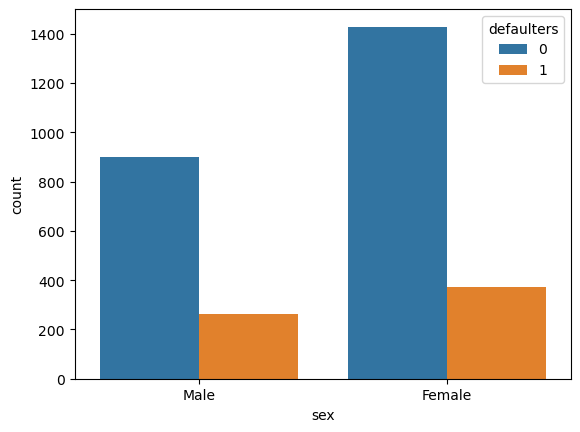

In [29]:
#  Melihat bar chart antara sex dan defaulters menggunakan seaborn

plot = sns.countplot(x = "sex", data = df, hue = "defaulters")
plot.set_xticklabels(["Male","Female"]);

Dari chart diatas kita bisa melihat sekilas bahwa kecenderungan 2 gender untuk menjadi `defaulters` lebih kecil. Dimana ditunjukkan pada bar untuk default = 0 lebih tinggi daripada default = 1 dan juga komposisi female lebih tinggi dari male.

[1801, 1163]

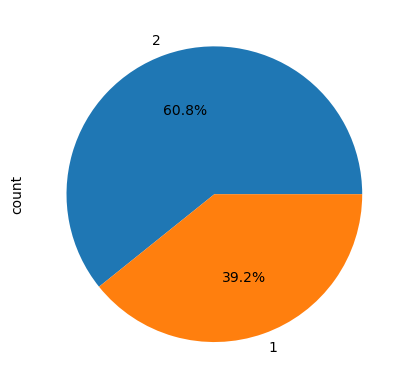

In [30]:
# Menghitung persen sex
perc_sex = df.sex.sum() / len(df.sex)
df['sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.plot()

# Melihat total value
list(df['sex'].value_counts().values)

Persentasi sex pada dataset bisa dilihat dari, 1 = male dengan 39,2% atau 1.163 orang dan 2 = female adalah 60,8% atau 1.801 orang. Terdapat lebih banyak female daripada male, ini sesuai dengan bar chart diatas dimana female memang lebih tinggi non defaulters

Kemudian saya akan melihat distribusi `marital_status` pada dataset.

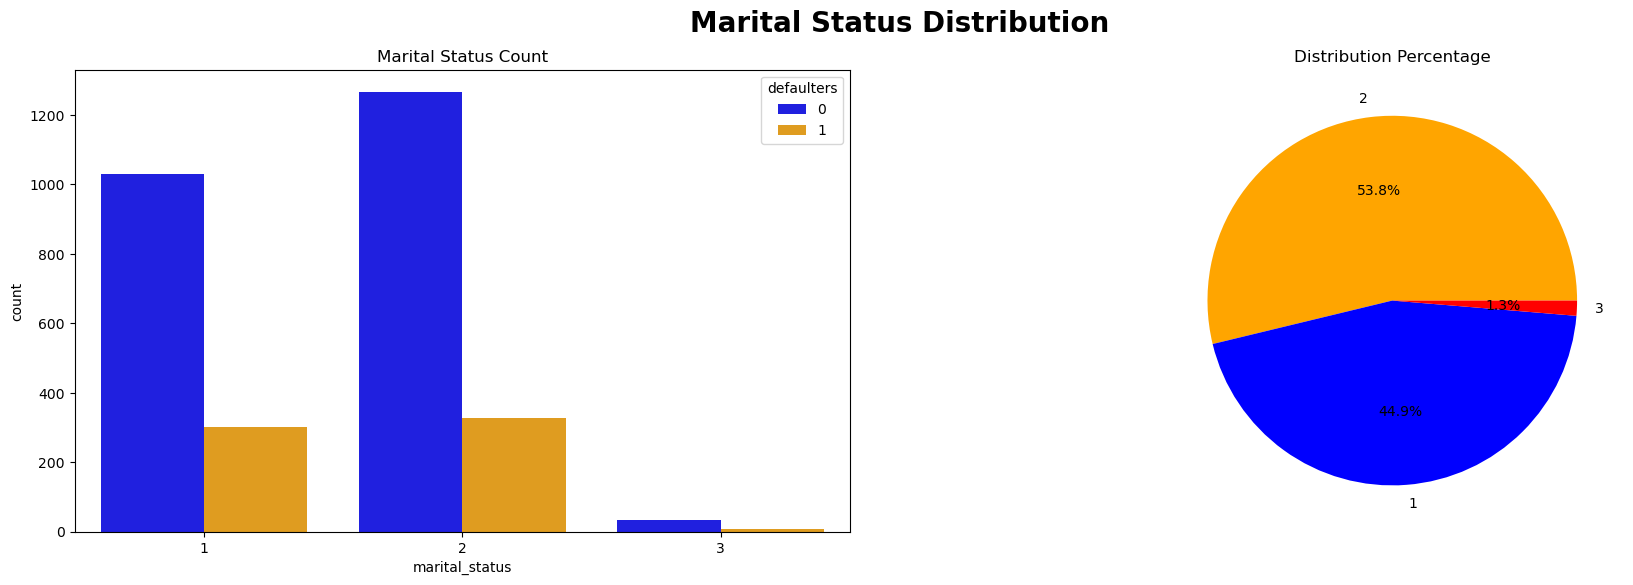

Perhitungan marital_status dari yang terbesar: [1594, 1331, 39]


In [31]:
# Untuk memberi warna pada chart kita mendefine dulu target colors
target_colors1=['blue','orange','red']
target_colors2=['orange','blue','red']

# Membuat kotak dasar untuk chart
fig=plt.figure(figsize=(22,6))
plt.suptitle('Marital Status Distribution',weight='bold',fontsize=20)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Membuat bar chart berisi count
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Marital Status Count')
# menggunakan seaborn untuk meggambar chart
sns.countplot(x='marital_status', data=df,ax=ax1,hue='defaulters',palette=target_colors1)

# mencoba membuat pie chart untuk melihat komposisi data cab_type
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Distribution Percentage')
# memasukkan perhitungan values counts cab_type kedalam index 
label=list(df['marital_status'].value_counts().index)
value=list(df['marital_status'].value_counts().values)

# Membuat pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%',colors=target_colors2)
# menunjukkan chart yang sudah dibuat
plt.show()

# list(df['marital_status'].value_counts().values)
print('Perhitungan marital_status dari yang terbesar:', list(df['marital_status'].value_counts().values))

Dari chart diatas terlihat bahwa value 2 = single berjumlah 1.594 orang (53.8%), 1 = married berjumlah 1.331 orang (44.9%) dan 3 = others berjumlah 39 orang (1.3%). Dimana jumlah non defaulters tertinggi ada pada customer single dan selanjut nya customer married dan yang paling kecil customer others. Sementara untuk defaulters pada marital status, customer single dan married tidak ada perbedaan signifikan.

Kemudian saya ingin melihat distirbusi dari `defaulters`

Persentase Defaulters = 1 adalah 21.423751686909583 %


[2329, 635]

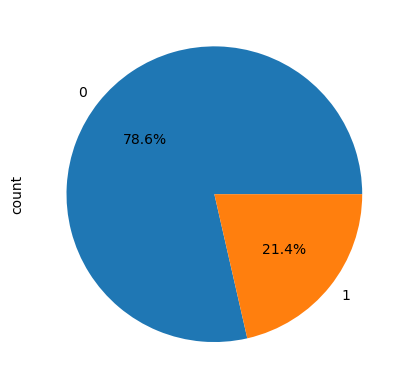

In [32]:
# Menghitung persentase defaulters
perc_default = df.defaulters.sum() / len(df.defaulters)
print(f'Persentase Defaulters = 1 adalah {perc_default*100} %')
df['defaulters'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.plot()

# Melihat total value
list(df['defaulters'].value_counts().values)

Dari chart terlihat bahwa 21.4%  atau 635 orang akan default atau gagal bayar hutang, sedangkan 78.6% atau 2.329 orang akan not default atau tidak gagal bayar hutang.

Membuat Scatterplot untuk `age` dan `limit balance` terhadap `defaulters`

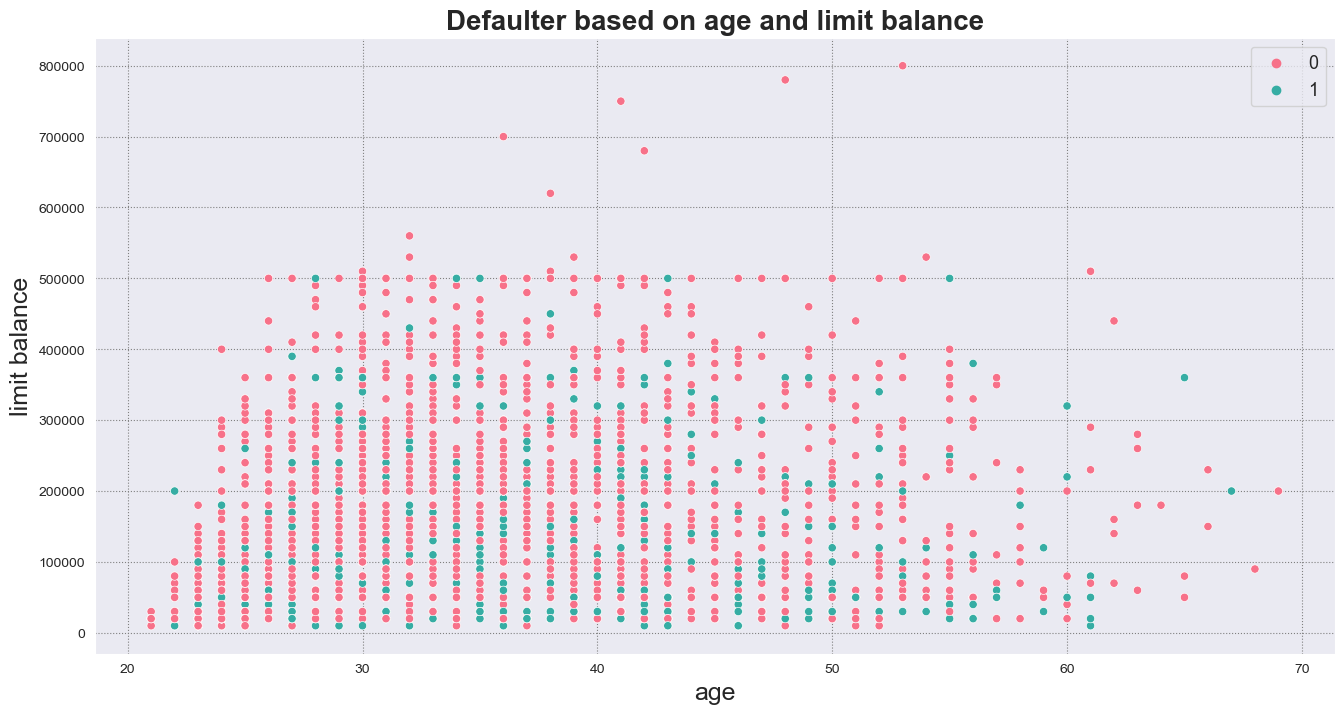

In [33]:
# menggunakan seaborn untuk memilih setting figure
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# figsize mengatur ukuran figure
plt.figure(figsize=(16,8))
# title untuk memberi judul serta ukuran dan fontnya
plt.title('Defaulter based on age and limit balance',size=20,fontweight='bold')
# membuat scatterplot dengan y= departure dan x=arrival, hue memplot satisfaction dan palette memberi warna
sns.scatterplot(y='limit_balance',data=df,x='age',hue='defaulters',palette='husl')
# memberi label x arrival dan label y departure
plt.xlabel('age',size=18)
plt.ylabel('limit balance',size=18)
# membuat kotak legend di atas kiri
plt.legend(fontsize='13')
plt.show() # menampilkan scatterplot/chart

Dari scatterplot terlihat bahwa distribusi defaulters dan non defaulters ada pada `age` 25-55. Kemudian pada umur 35- 55 terdapat customer yang mempunyai `limit_balance` yang tinggi mencapai 800.000 dan mempunyai status not defaulters. Dari plot diatas juga dapat terlihat bahwa `defaulters` hanya mempunyai `limit_balance` dibatas 500.000.

Kemudian melihat korelasi antara variable pada dataset ini dengan heatmap

<Axes: >

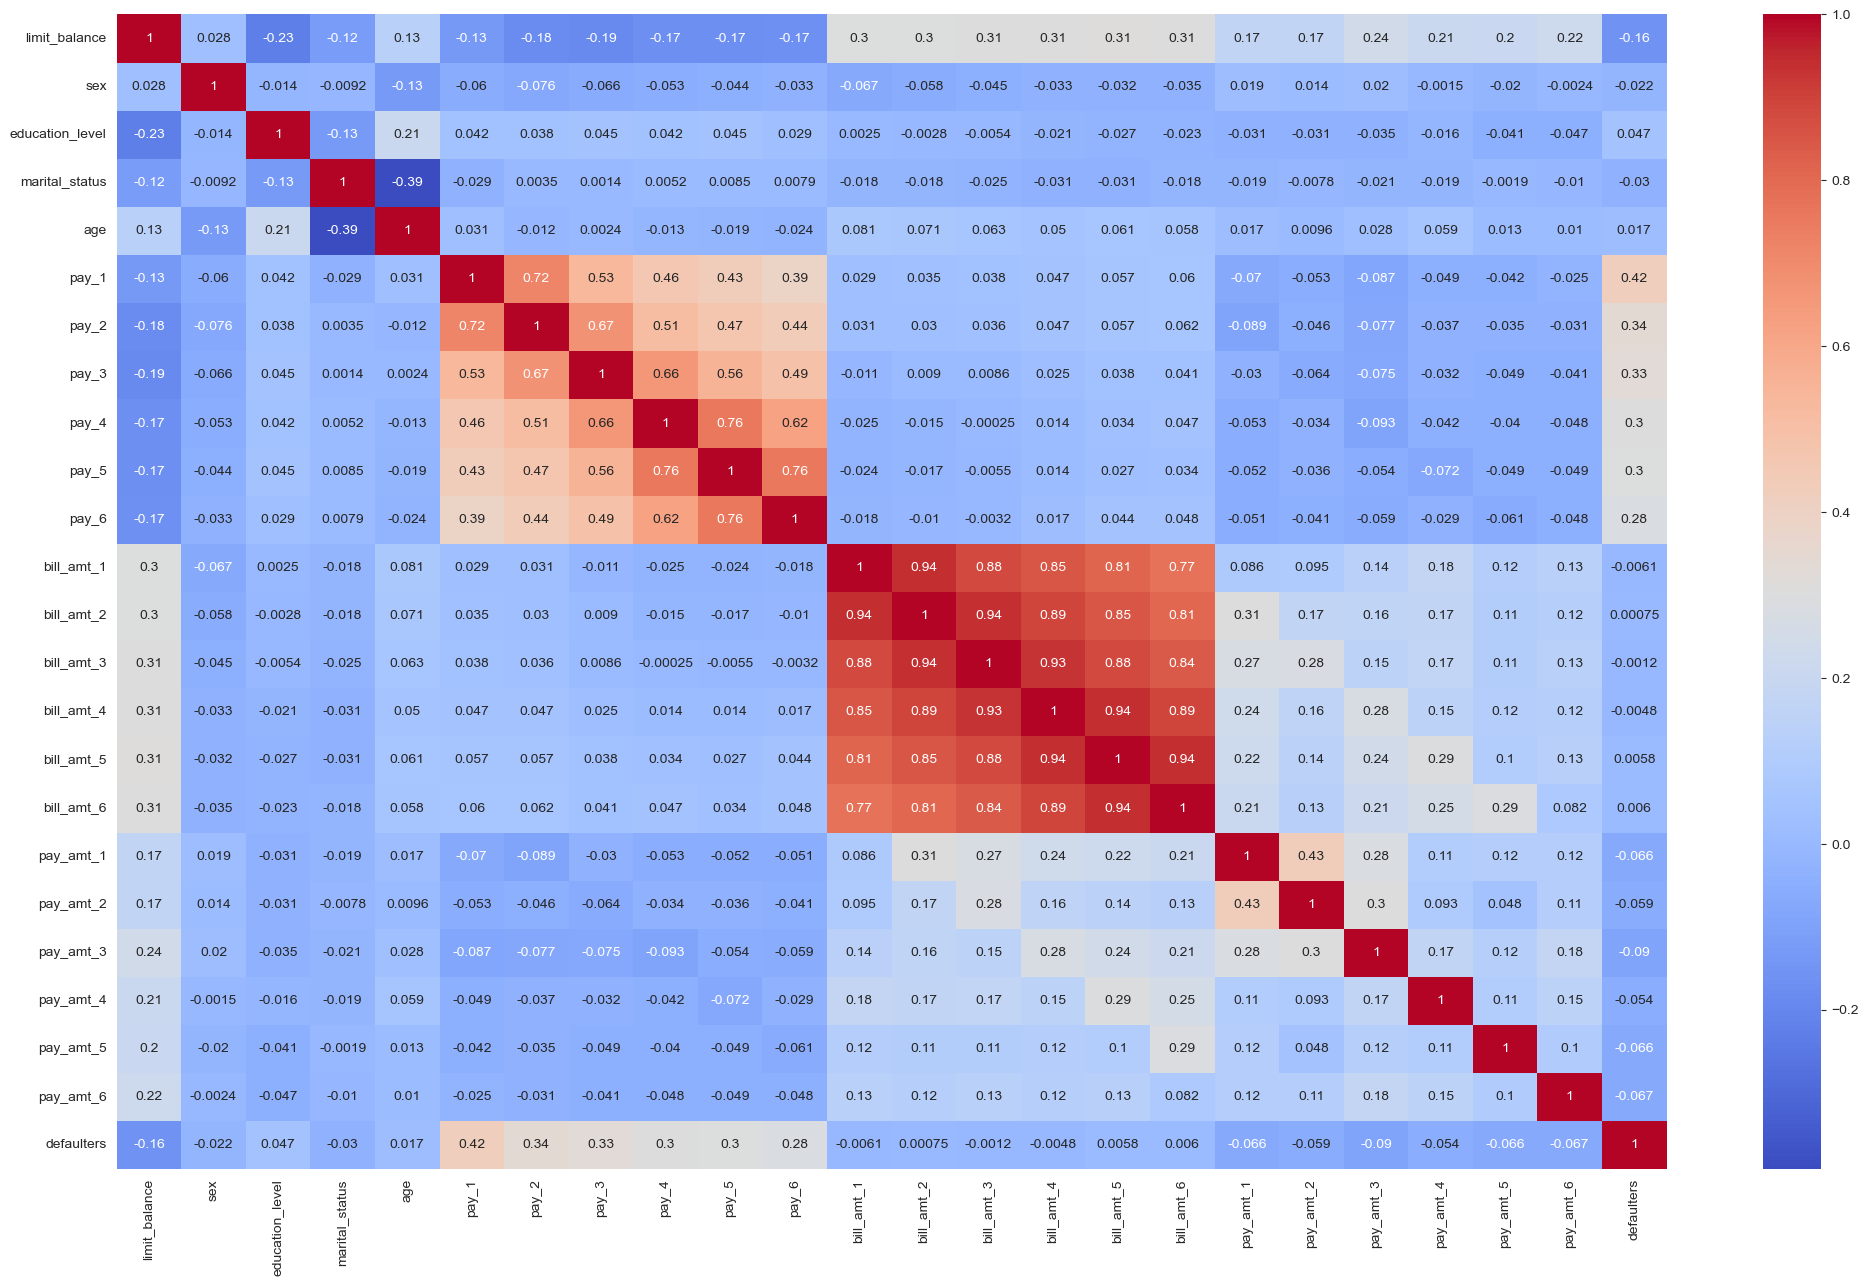

In [34]:
# membuat heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Pada heatmap terlihat bahwa target variabel tidak ada yang berkorelasi besar dengan variabel lain, sedangkan pada beberapa fitur-fitur berkorelasi satu sama lain yang sejenis. Seperti pada fitur `pay_0` sampai dengan `pay_6` terlihat mempunyai korelasi dengan sesama column pay. Lalu pada `bill_amt_1` sampai dengan `bill_amt_6` mempunyai korelasi dengan sesama column bill. Yang kemungkinan diantara column ini ada yang akan didrop untuk analisa selanjutnya.

# Bab 5: Feature Engineering

Pada tahap ini saya akan memilih fitur-fitur yang terdapat pada dataset untuk digunakan dalam pembuatan model. Fitur-fitur ini akan dikurangi dimensi datanya atau dikembangkan jika dirasa perlu, kemudian akan dimanfaatkan dengan digunakan pada berbagai teknik.

## Feature Selection

## Cardinality Check

In [35]:
# Menghitung total Cardinality pada categorical variabel
print('Number of categories in the variable sex             : {}'.format(len(df.sex.unique())))
print('Number of categories in the variable education_level : {}'.format(len(df.education_level.unique())))
print('Number of categories in the variable marital_status  : {}'.format(len(df.marital_status.unique())))
print('Number of categories in the variable pay_1           : {}'.format(len(df.pay_1.unique())))
print('Number of categories in the variable pay_2           : {}'.format(len(df.pay_2.unique())))
print('Number of categories in the variable pay_3           : {}'.format(len(df.pay_3.unique())))
print('Number of categories in the variable pay_4           : {}'.format(len(df.pay_4.unique())))
print('Number of categories in the variable pay_5           : {}'.format(len(df.pay_5.unique())))
print('Number of categories in the variable pay_6           : {}'.format(len(df.pay_6.unique())))
print('Total data                                           : {}'.format(len(df)))

Number of categories in the variable sex             : 2
Number of categories in the variable education_level : 4
Number of categories in the variable marital_status  : 3
Number of categories in the variable pay_1           : 9
Number of categories in the variable pay_2           : 8
Number of categories in the variable pay_3           : 7
Number of categories in the variable pay_4           : 8
Number of categories in the variable pay_5           : 7
Number of categories in the variable pay_6           : 6
Total data                                           : 2964


Categorical variabel dalam dataset ini termasuk low cardinality

Menghitung VIF score untuk melihat multicollinearity antar variable independent khususnya numerical variable.

In [36]:
# Memasukkan fitur yaitu variable indepent (numerical)
considered_features = ['age', 'limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3',
                        'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 
                        'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

In [37]:
# function compute_vif untuk menghitung skor VIF dari fitur independent yang dipilih
def compute_vif(considered_features):
    
    X = df[considered_features]
    # menghitung vif membutuhkan konstant
    X['intercept'] = 1
    
    # membuat dataframe vif untuk menyimpan value dari vif
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [38]:
# menghitung vif skor
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
3,bill_amt_2,26.080460
6,bill_amt_5,24.880856
5,bill_amt_4,21.243845
4,bill_amt_3,18.309752
2,bill_amt_1,15.929560
7,bill_amt_6,14.186051
8,pay_amt_1,2.325799
9,pay_amt_2,1.746113
12,pay_amt_5,1.673379
10,pay_amt_3,1.640352


Pada skor VIF diatas terlihat beberapa column mempunyai skor 10 diatas 10 sehingga diduga ada multicolinearity atau ada korelasi antar fitur. Saya akan coba drop `bill_amt_2` yang mempunyai skor VIF paling tinggi dari `considered features` dan mencoba menghitung kembali dan melihat skornya.

In [39]:
# Menghapus column bill_amt_2  dan menghitung ulang vif
considered_features.remove('bill_amt_2')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
5,bill_amt_5,24.880616
4,bill_amt_4,21.233594
3,bill_amt_3,15.514026
6,bill_amt_6,14.182410
2,bill_amt_1,5.773852
8,pay_amt_2,1.669481
11,pay_amt_5,1.665864
9,pay_amt_3,1.639448
10,pay_amt_4,1.458466
7,pay_amt_1,1.430699


In [40]:
# Menghapus column bill_amt_5  dan menghitung ulang vif
considered_features.remove('bill_amt_5')
compute_vif(considered_features)

,Variable,VIF
0,age,1.024094
1,limit_balance,1.256351
2,bill_amt_1,5.772369
3,bill_amt_3,15.513514
4,bill_amt_4,15.919973
5,bill_amt_6,6.744983
6,pay_amt_1,1.428313
7,pay_amt_2,1.668475
8,pay_amt_3,1.636005
9,pay_amt_4,1.203406


In [41]:
# Menghapus column bill_amt_4  dan menghitung ulang vif
considered_features.remove('bill_amt_4')
compute_vif(considered_features)


,Variable,VIF
0,age,1.021987
1,limit_balance,1.255303
2,bill_amt_1,5.767583
3,bill_amt_3,9.327054
4,bill_amt_6,4.530052
5,pay_amt_1,1.428312
6,pay_amt_2,1.511478
7,pay_amt_3,1.282911
8,pay_amt_4,1.127956
9,pay_amt_5,1.221127


In [42]:
# Menghapus column bill_amt_3  dan menghitung ulang vif
considered_features.remove('bill_amt_3')
compute_vif(considered_features)

,Variable,VIF
0,age,1.021788
1,limit_balance,1.255041
2,bill_amt_1,2.718556
3,bill_amt_6,3.017484
4,pay_amt_1,1.316762
5,pay_amt_2,1.289761
6,pay_amt_3,1.222822
7,pay_amt_4,1.113540
8,pay_amt_5,1.161191
9,pay_amt_6,1.106172


VIF score pada column yang tersisa sudah dibawah 10, maka columns `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`yang sudah di drop akan di hapus dari data.

In [43]:
# Drop kolom yang tidak dibutuhkan
df.drop(['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4'], axis=1,inplace=True)

## Splitting X dan y

Kemudian data set akan dibagi menjadi X dan y

In [44]:
# Membagi data X sebagai features dan price sebagai y
X = df.drop(columns=['defaulters']) 
y = df['defaulters'] 

X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,4,1,54.0,0,0,0,0,0,0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0,0,0,0,0,0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,4,2,22.0,0,0,0,0,0,0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0,0,0,0,0,0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0,0,0,0,0,0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,80000.0,2,3,2,28.0,0,0,0,0,0,0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2960,50000.0,2,3,1,51.0,0,0,0,0,0,0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2961,450000.0,2,2,1,38.0,0,0,0,0,0,0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2962,50000.0,2,2,1,44.0,0,0,0,0,0,0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


## Split data menjadi Train set dan Test set

Dilanjutkan dengan membagi X dan y menjadi Train set dan Test set

In [45]:
# Membagi data menjadi train set dan temporary set, X dibagi dan y juga dibagi
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.2, random_state=21) #random_state untuk menetapkan data, klau tidak diisi data jadi random tiap di run

# Membagi temp menjadi test dan inference (95% test, 5% inference)
X_test, X_inference, y_test, y_inference = train_test_split(X_temp, y_temp, test_size=0.05, random_state=21)

# Menghitung total data pada X_train dan X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_inference shape:", X_inference.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_inference shape:", y_inference.shape)
X_train.head()


X_train shape: (2371, 19)
X_test shape: (563, 19)
X_inference shape: (30, 19)
y_train shape: (2371,)
y_test shape: (563,)
y_inference shape: (30,)


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
118,300000.0,1,1,2,25.0,0,0,0,0,0,0,18169.0,18533.0,4103.0,1427.0,600.0,1200.0,2500.0,18000.0
794,160000.0,2,2,1,35.0,0,0,0,0,0,0,4635.0,2744.0,2000.0,1000.0,500.0,1000.0,1000.0,2000.0
2100,200000.0,2,1,1,41.0,0,0,2,0,0,0,4680.0,0.0,5932.0,0.0,0.0,4680.0,0.0,0.0
647,30000.0,2,2,1,27.0,0,0,0,0,0,0,19535.0,19580.0,1712.0,1400.0,442.0,391.0,500.0,0.0
2854,360000.0,2,2,1,29.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing Value Handling

Kemudian dilakukan penghitungan missing value

In [46]:
X.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [47]:
y.isnull().sum()

0

Karena pada dataset tidak terdapat missing value, maka saya akan lanjutkan ke Outliers

## Handling Outliers

Pada proses ini saya akan melihat outliers yang ada pada data, dan jika ada akan dilakukan handling baik drop atapun capping

In [48]:
# Melihat distribusi data pada numerical column
numerical_columns = X_train.select_dtypes(include='float64').columns
skewness_values = X_train[numerical_columns].skew()

print("Skewness for numerical columns:")
print(skewness_values)

Skewness for numerical columns:
limit_balance     1.020812
age               0.763314
bill_amt_5        2.453753
bill_amt_6        2.481384
pay_amt_1        12.138810
pay_amt_2        28.367091
pay_amt_3         8.058668
pay_amt_4         8.828516
pay_amt_5        11.545845
pay_amt_6        10.117806
dtype: float64


Pada numerical column, skewness melebihi 1 yang artinya distribusi data extremely skewed. Tapi pada data ini sebaiknya dilakukan Capping agar data tidak terhapus karena jumlah data tidak terlalu banyak.

In [49]:
# Melakukan capping pada column numerical 
winsorizer_outliers = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['limit_balance','bill_amt_5','bill_amt_6', 'pay_amt_1', 'pay_amt_2', 
                                        'pay_amt_3', 'pay_amt_4','pay_amt_5', 'pay_amt_6'])

X_train_capped = winsorizer_outliers.fit_transform(X_train)
X_test_capped = winsorizer_outliers.transform(X_test)

In [50]:
print(f'Shape Of Data {df.shape}')
df.head()

Shape Of Data (2964, 20)


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,defaulters
0,80000.0,1,4,1,54.0,0,0,0,0,0,0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0,0,0,0,0,0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,4,2,22.0,0,0,0,0,0,0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0,0,0,0,0,0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0,0,0,0,0,0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


## Split numerical and categorical

In [51]:
# Membuat Numerical dan Categorical Columns

num_col = X_train_capped.select_dtypes(include=['float64']).columns.tolist()
cat_col = X_train_capped.select_dtypes(include=['int64']).columns.tolist()

# Menampilkan Numerical column dan Categorical column
print('Numerical Columns:', num_col)
print('Categorical Columns:', cat_col)

Numerical Columns: ['limit_balance', 'age', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns: ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


# Bab 6: Model Definition



In [52]:
log_model = LogisticRegression()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Bab 7: Model Training

## Preprocessor

Bagian ini akan menyiapkan data sebelum dimasukkan kedalam pipeline model. Membuat numerical pipeline untuk dilakukan feature scaling menggunakan StandardScaler. Dilanjutkan dengan membuat categorical pipeline dan dilakukan feature encoding menggunakan OneHotEncoder.

In [53]:
# Membuat numerical pipeline dan diproses menggunakan StandardScaler
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
# Membuat categorical pipeline dan diproses menggunakan OneHotEncoder
categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='ignore',sparse=False))
])

Kemudian memasukkan column yang sesuai kedalam numerical dan categorical pipeline lalu menggunakan ColumnTransformer untuk mengaplikasikannya kedalam preprocessor yang akan digunakan dalam pipeline model.

In [54]:
# Membuat preprocessor sebagai suatu proses yang termasuk didalamnya scaler dan encoder
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, num_col),
    ("categoric", categorical_pipeline, cat_col)
])

### Pipeline Logistic Regression

Membuat pipeline Logistic Regression dan memasukkan preprocessor sebagai bagian dari langkah pipeline

In [55]:
# Define pipeline untuk Logistic Regression
pipeline_Logreg = Pipeline([("prep", preprocessor),("logreg", LogisticRegression(random_state=21))])

In [56]:
# Memasukkan X_train dan y_train kedalam pipeline
pipeline_Logreg.fit(X_train_capped, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('logreg', LogisticRegression(random_state=21))])

In [57]:
# Melihat skor dari pipeline terhadap X_test dan y_test
pipeline_Logreg.score(X_test_capped, y_test)

0.8454706927175843

### Pipeline KNN

In [58]:
# Define pipeline untuk KNN
pipeline_KNN = Pipeline([("prep", preprocessor),("model_KNN", KNeighborsClassifier())])

In [59]:
# Memasukkan X_train dan y_train kedalam pipeline
pipeline_KNN.fit(X_train_capped, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('model_KNN', KNeighborsClassifier())])

In [60]:
# Melihat skor dari pipeline terhadap X_test dan y_test
pipeline_KNN.score(X_test_capped, y_test)

0.7992895204262878

### Pipeline SVC

In [61]:
# Define pipeline untuk KNN
pipeline_SVC = Pipeline([("prep", preprocessor),("model_SVC", SVC())])

In [62]:
# Memasukkan X_train dan y_train kedalam pipeline
pipeline_SVC.fit(X_train_capped, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('model_SVC', SVC())])

In [63]:
# Melihat skor dari pipeline terhadap X_test dan y_test
pipeline_SVC.score(X_test_capped, y_test)

0.8472468916518651

### Cross Validation antara Pipeline

Pada bagian ini saya akan melakukan Cross Validation antara 3 model diatas dengan jumlah split = 5 dengan hasil akhir f1 score

In [64]:
# Define SKfold
skfold = StratifiedKFold(n_splits=5)

In [65]:
# Define Cross Validation untuk setiap model
cv_log_model = cross_val_score(pipeline_Logreg, X_train_capped, y_train, cv=skfold, scoring = 'f1')
cv_svm_model = cross_val_score(pipeline_SVC, X_train_capped, y_train, cv=skfold, scoring = 'f1')
cv_knn_model = cross_val_score(pipeline_KNN, X_train_capped, y_train, cv=skfold, scoring = 'f1')

In [66]:
# Mencari model terbaik berdasarkan Cross_Val_score (mean)
name_model = []
cv_scores=0

for cv,name in zip([cv_log_model, cv_svm_model, cv_knn_model],
                   ['log_model','svm_model','knn_model']):
    # membuat output looping
    print(name)
    print('f1 score - ALL - Cross Validation:', cv)
    print('f1 score - Mean - Cross Validation:', cv.mean())
    print('f1 score - std - Cross Validation:', cv.std())
    print('f1 score - Range of Test Set:', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)

    # Membuat condition untuk mencari model terbaik berdasarkan cv.Mean()
    if  cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

# Menampilkan hasil dari perhitungan
print('Best Model:',name_model)
print('Cross val mean from best model:', cv_scores)


log_model
f1 score - ALL - Cross Validation: [0.46451613 0.56097561 0.47798742 0.58285714 0.4875    ]
f1 score - Mean - Cross Validation: 0.5147672606058291
f1 score - std - Cross Validation: 0.047734431796704044
f1 score - Range of Test Set: 0.46703282880912506 - 0.5625016924025331
--------------------------------------------------
svm_model
f1 score - ALL - Cross Validation: [0.45751634 0.52229299 0.4875     0.58333333 0.46451613]
f1 score - Mean - Cross Validation: 0.5030317591730891
f1 score - std - Cross Validation: 0.04607750138190433
f1 score - Range of Test Set: 0.45695425779118476 - 0.5491092605549934
--------------------------------------------------
knn_model
f1 score - ALL - Cross Validation: [0.42105263 0.40268456 0.44025157 0.48148148 0.37837838]
f1 score - Mean - Cross Validation: 0.42476972550484815
f1 score - std - Cross Validation: 0.03495608413941403
f1 score - Range of Test Set: 0.3898136413654341 - 0.4597258096442622
------------------------------------------------

Dari hasil cross validation menampilkan hasil bahwa model terbaik adalah log_model atau model Logistic Regression dengan mean 0.51

### Hyperparameter tuning dengan GridSearch CV

Melakukan Hyperparameter tuning dari model terbaik dari cross validation yaitu model Logistic Regression.

In [67]:
# Membuat parameter berisi nilai C
parameter = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]}
# Menggunakan GridSearchCV sebagai parameter tuning
grid_logreg = GridSearchCV(pipeline_Logreg,param_grid=parameter,n_jobs=-1, cv=3)
grid_logreg.fit(X_train_capped, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'bill_amt_5',
                                                                          'bill_amt_6',
                                                                          'pay_amt_1',
                                                                          'pay_amt_2',
                                                                          'pay_amt_3',
                                                                          'pay_amt_4',
                                                                          'pay_amt_5',
                                                                          'pay_amt_6']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['sex',
                                                                          'education_level',
                                                                          'marital_status',
                                                                          'pay_1',
                                                                          'pay_2',
                                                                          'pay_3',
                                                                          'pay_4',
                                                                          'pay_5',
                                                                          'pay_6'])])),
                                       ('logreg',
                                        LogisticRegression(random_state=21))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [68]:
# Melihat parameter terbaik
best_params_logreg = grid_logreg.best_params_
best_params_logreg

{'logreg__C': 10}

Pada model kali ini parameter terbaik untuk C dengan nilai 10, kemudian dilanjutkan dengan memasukkan ke dalam best estimator

In [69]:
# Menghitung skor grid untuk X train dan Xtest
grid_logreg.score(X_train_capped, y_train), grid_logreg.score(X_test_capped, y_test)

(0.8409953606073387, 0.8454706927175843)

In [70]:
# Define Best Estimator
best_estimator_logreg = grid_logreg.best_estimator_
best_estimator_logreg

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5', 'pay_amt_6']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_1',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6'])])),
                ('logreg', LogisticRegression(C=10, random_state=21))])

Best estimator telah di define, lalu dilanjutkan dengan menghitung Coefficient dan Interceptnya

In [71]:
# Menampilkan coefficients dan intercept dari Logistic Regression

print('Coefficient : ', best_estimator_logreg.named_steps['logreg'].coef_)
print('Intercept   : ', best_estimator_logreg.named_steps['logreg'].intercept_)

Coefficient :  [[-0.11443611  0.09333091  0.27627458 -0.05371536 -0.07958304 -0.21796429
  -0.01122168 -0.14225023 -0.02348254 -0.06575135 -0.07545331  0.05445715
   0.00664352  0.34540951 -0.02954052 -0.34350867  0.2966256   0.2160335
  -0.53365525 -1.47957698 -0.6260358   0.86176739  2.04333181 -0.25388093
  -1.08656403  0.46975035  0.05021204  1.05117509 -1.16105526  0.9134833
   1.31583754 -1.88680218 -0.77359702  0.46975035  0.05021204 -1.26822324
  -0.76231182 -0.70481421  0.04066385  1.07669296  0.43138209  1.16561421
  -0.66358322 -0.13144486  0.5169016   0.82958163 -0.07374385  0.38117006
  -0.1062805  -0.77359702  0.24527736  0.64193754 -0.36105089 -0.64723419
   0.59878148  0.38117006 -0.87987751 -0.31137047  0.01137445 -0.59002635
   0.97902611 -0.00371939 -0.1062805 ]]
Intercept   :  [-0.06309689]


Mendapatkan Coefficient dalam bentuk array bisa dilihat diatas, dengan Intercept -0.06

Selanjutnya menghitung f1 score dari model Logistic Regression

In [72]:
# Membuat function untuk melihat f1 score

def performance_check(grid_logreg, X, y):
  y_pred = grid_logreg.predict(X)

  return f1_score(y, y_pred)

# Melihat f1 score dari hasil crossval

print('f1 score - Train : ', performance_check(best_estimator_logreg, X_train_capped, y_train))
print('f1 score - Test  : ', performance_check(best_estimator_logreg, X_test_capped, y_test))

f1 score - Train :  0.5374233128834356
f1 score - Test  :  0.48520710059171596


Dari model didapatkan untuk Train f1 score : 0.53 dan Test f1 score: 0.48.
Kemudian akan dilakukan model evaluation dengan menampilkan confusion matrix


# Bab 8: Model Evaluation

Pada tahap ini, model Logistic Regression akan dinilai apakah bekerja dengan baik atau tidak. Evaluasi akan menggunakan beberapa metric yaitu f1 score, precision, accuracy dan recall. Tapi yg metric utama adalah f1 score.

precision - Test Set   :  0.7321428571428571
recall - Test Set   :  0.36283185840707965
accuracy - Test Set   :  0.8454706927175843
F1 Score - Test Set   :  0.48520710059171596 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       450
           1       0.73      0.36      0.49       113

    accuracy                           0.85       563
   macro avg       0.80      0.66      0.70       563
weighted avg       0.83      0.85      0.82       563
 

Confusion Matrix      : 


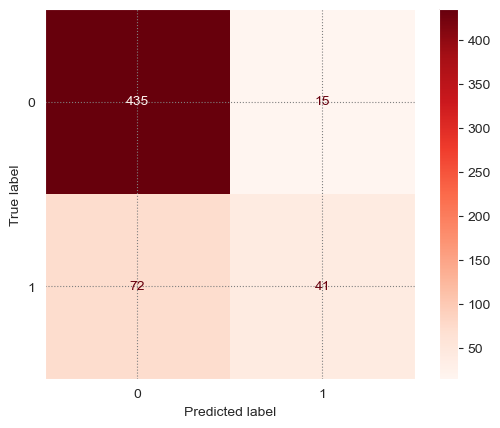

In [73]:
# Melihat Logistic Regression Model terhadap Test-Set

y_pred_test = pipeline_Logreg.predict(X_test)

print('precision - Test Set   : ', precision_score(y_test, y_pred_test))
print('recall - Test Set   : ', recall_score(y_test, y_pred_test))
print('accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_Logreg, X_test, y_test, cmap='Reds'))

Setelah dihitung pada model Logistic Regression mendapatkan f1-score test 48%. Pada model ini walaupun accuracy score mendapat 84% tetapi karena data target imbalance maka metric yang digunakan akan tidak sesuai. Sehingga menurut saya metric yang tepat adalah f1-score.
Dari confusion matrix bisa dilihat True Positive 41, False Positive 15, True Negative 439 dan False Negative 72 yang menurut saya cukup baik dalam model kali ini.

# Bab 9: Model Saving

In [74]:
# Menyimpan pipeline
with open('pipeline_Logreg.pkl', 'wb') as file1:
    pickle.dump(pipeline_Logreg, file1)

# Menyimpan preprocessor
with open('preprocessor.pkl', 'wb') as file2:
    pickle.dump(preprocessor, file2)

# Bab 10: Model Inference

In [75]:
# Meyimpan data inference yang sudah disiapkan ke csv
X_inference.to_csv('X_inference.csv')
y_inference.to_csv('y_inference.csv')

# Bab 11: Conclusion

Melakukan Over sampling dan Under Sampling untuk meningkatkan data imbalance

Kesimpulan yang saya dapat akan dibagi menjadi beberapa bagian:

Insight dari EDA:
- Terdapat kecenderungan bahwa jumlah defaulters lebih kecil dibandingkan non defaulters. 
- Jumlah non defaulters tertinggi terdapat pada kategori single, diikuti oleh married, dan paling rendah pada kategori others.
- Sebanyak 21.4% dari dataset diperkirakan akan mengalami default, sedangkan 78.6% diperkirakan tidak akan mengalami default.
- Distribusi defaulters dan non defaulters banyak terkonsentrasi pada rentang usia 25-55 tahun.
- Tidak terlihat adanya korelasi besar antara variabel target dengan variabel lain.

Berdasarkan Model Evaluation kesimpulan yang bisa diambil:

- Accuracy Score: Model memiliki akurasi sebesar 84%, yang mungkin terlihat baik pada pandangan pertama.
F1-Score: F1-score, yang memperhitungkan presisi dan recall, memberikan gambaran yang lebih akurat karena adanya ketidakseimbangan dalam data target. Dengan f1-score sebesar 48%, terlihat bahwa model mungkin memiliki kinerja yang lebih rendah terutama karena adanya ketidakseimbangan data.

Dari segi bisnis, insight yang bisa diambil dari analisa:
- Mengidentifikasi dan memprediksi defaulters membantu perusahaan untuk mengelola risiko kredit dengan lebih efektif.
- Batas kredit yang disesuaikan secara individual dapat membantu mengurangi risiko defaulters sambil mempertahankan pelanggan yang baik.
- Darihasil prediksi defaulters, perusahaan dapat melakukan segmentasi pelanggan berdasarkan resiko kredit.

Further Improvement:

- Meskipun terdapat True Positives yang cukup baik, perhatian khusus perlu diberikan pada False Positives dan False Negatives, terutama dalam konteks kasus yang lebih spesifik.
Mungkin perlu dilakukan penyesuaian hyperparameter, pemilihan fitur, atau pengolahan lebih lanjut pada data untuk meningkatkan performa model. Terutama melakukan balancing dari target column dengan cara Oversampling atau Undersampling data atau penyesuaian treshold.

# CONCEPTUAL PROBLEMS

1. Pada logistic regression algorithm, coefficients adalah suatu nilai yang mewakilkan hubungan antara variabel independen dan variable dependen. Pada dataset ini karena data target 0 dan 1 maka nilai coefficients akan dihitung sebagai log-odds, yang jika koefisiennya besar maka kegunaannya akan lebih besar untuk prediksi.

2. Pada Support Vector Machine, kernel adalah fungsi untuk menghitung kemiripan antara 2 vektor data.  
Kernel yang saya pahami adalah RBF kernel, dimana data yang sangat kompleks sehingga susah dibagi dengan garis batas yang linear akan dibuat menjadi dimensi yang lebih tinggi seperti ditarik keatas atau bawah lalu kemudian di beri garis batas. Kernel ini baik digunakan jika kita tidak mengetahui distribusi data dan data diduga punya outlier.

3. Pemilihan nilai K harus sesuai dengan dataset yang dipakai, untuk memilih nilai K yang optimal kita dapat menggunakan proses hyperparameter tuning. Model akan dibagi menjadi beberapa bagian atau difold yang kemudian setiap folds akan dievaluasi dengan cross validation. Proses tersebut akan menghasilkan report yang menunjukkan nilai hyperparameter yang optimal, agar hasil prediksi semakin baik kita dapat menggunakan nilai K tersebut.

4. Metrics ini adalah yang umum digunakan untuk menilai seberapa baik model bekerja.

- Accuracy bisa diartikan sebagai seberapa akurat model memprediksi, metrics ini bagus jika digunakan pada dataset yang mempunyai target class seimbang.

- Precision bisa di artikan seberapa banyak True Positive atau Prediksi Positif yang benar, berguna jika memiliki data yang sensitif terhadap False Positive atau butuh FP seminimal mungkin.

- Recall bisa diartikan seberapa banyak kelas Positive yang bisa dihitung, berguna jika hasil False Negative sangat berdampak pada dataset.

- F1 score bisa diartikan sebagai penengah atau jumlah rata-rata dari precision dan recall, berguna untuk mencari keseimbangan hasil antara precision dan recall. 